In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open(
    'data_sample.txt',
    mode='r',
    encoding='utf8') as f:
    sample_raw = [float(x) for x in f.read().split()]

In [3]:
X = pd.Series(sorted(sample_raw))
n = len(X)

In [4]:
def EDF(x):
    l, r = 0, len(X) - 1
    while l < r:
        # boundary cases
        if x < X[l]:  return l
        if X[r] <= x: return r+1
        # to avoid inf loop
        if X[l] <= x:    l += 1
        if X[r-1] >  x: r -= 1
        m = (l+r)//2
        if   x < X[m]: r = m
        elif x > X[m]: l = m
        else: l = m
    return (l+r)//2 + 1

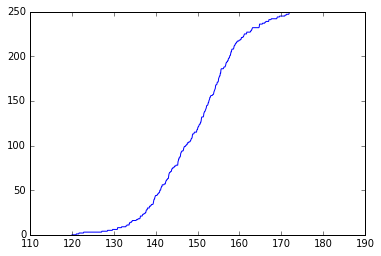

In [5]:
x_ab = np.linspace(min(X)-1, max(X)+1, 768)
img_edf = [EDF(x) for x in x_ab]
plt.plot(x_ab, img_edf)

In [6]:
def K(z, eps=0.0001):
    if z <= 0: return 0
    N = int(np.floor(np.sqrt(np.log(1/eps))/z)) + 1
    v = 0
    for k in range(-N, N+1):
        term = np.exp(-2 * (k*z)**2)
        if k%2: term *= -1
        v += term
    return v

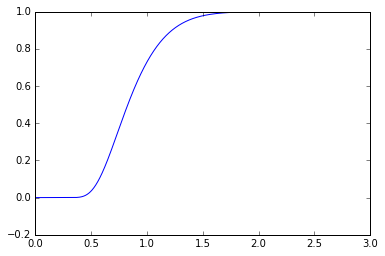

In [7]:
x_ab = np.linspace(0, 3, 2048)
img = [K(x, eps=0.001) for x in x_ab]
plt.plot(x_ab, img)

Из методички:
> Зададимся вероятностью $\alpha$, такой
> что событие, происходящее с вероятностью $1-\alpha$
> является практически достоверным

WTF? $\alpha=0$?
Где определение "практически достоверного события"?

> Вычислим корень уравнения $1-K(z) = \alpha$

Т.е. задача в максимизации значения функции $K$?

$z_\alpha=2.736880$
$\alpha=0.000001$


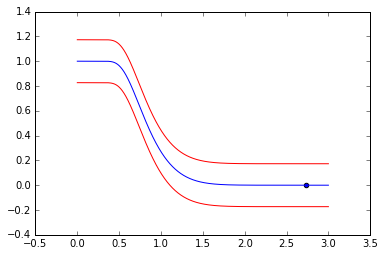

In [8]:
def K_c(z, eps=.00001): return 1-K(z, eps)
opt = sp.optimize.minimize(
    K_c,
    2,
    method='l-bfgs-b',
    bounds=((0, 3),))
z_alpha = opt.x[0]
alpha = K_c(z_alpha)
print("$z_\\alpha=%f$"%z_alpha)
print("$\\alpha=%f$"%alpha)
ab = np.linspace(0,3,2048)
img_ab = np.array([K_c(x) for x in ab])
plt.plot(ab, img_ab)
plt.scatter((z_alpha, ), (K_c(z_alpha),))
delta = z_alpha/np.sqrt(n)
plt.plot(ab, img_ab - delta, color='red')
plt.plot(ab, img_ab + delta, color='red')